In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


# Load data function

In [318]:
def load_data(csv_file_path):
    df = pd.read_csv(csv_file_path)
    print('load data  for',file_path)
    df['marker'] = df['marker'].replace('Natural', 0)
    df['marker'] = df['marker'].replace('Attack', 1)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    y=df['marker']
    scaler = MinMaxScaler()
    X = scaler.fit_transform(df.drop(columns='marker',axis=1))
    X=pd.DataFrame(X)
    X['label']=y.values
    return X,y

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,0.679128,0.879835,0.345785,0.618070,0.012333,0.637097,0.678872,0.270211,0.331678,0.555129,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.697246,0.887654,0.363914,0.644079,0.030498,0.661290,0.716442,0.147181,0.366630,0.305533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.708024,0.895679,0.374690,0.670773,0.041254,0.684864,0.717811,0.153089,0.376864,0.304120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.707531,0.894856,0.374244,0.668036,0.040792,0.682382,0.715057,0.154747,0.376164,0.304523,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.707340,0.894650,0.373989,0.667351,0.040569,0.682382,0.713942,0.155369,0.375846,0.304725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,0.868699,0.887037,0.535350,0.642710,0.202110,0.659429,0.880699,0.180037,0.547773,0.349152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4967,0.866693,0.891358,0.533313,0.657769,0.200150,0.673077,0.866833,0.188744,0.533193,0.366721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4968,0.866136,0.891770,0.532788,0.658453,0.199560,0.673697,0.864939,0.189469,0.531283,0.368336,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4969,0.866072,0.891770,0.532677,0.658453,0.199496,0.674318,0.864636,0.189677,0.531236,0.368538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Feature Selection based Gradient Boosting 

In [ ]:
# Specify the folder path
folder_path = 'binaryAllNaturalPlusNormalVsAttacks/'
start_time = time.time()

# Initialize an empty list to store DataFrames
dfs = []
i=0
# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('csv'):
        file_path = os.path.join(folder_path, file_name)
        
        X,y=load_data(file_path)
        n_estimators_values = [100,500,700,1000]
        for n_estimators in n_estimators_values:
           
            # Create Gradient Boosting model
            model = GradientBoostingClassifier(n_estimators=n_estimators)
            # Split the dataset into training and testing sets
            # Train the model
            model.fit(X, y)
            # Evaluate feature importance using the Weighted Feature Importance (WFI) scoring model
            feature_importance = model.feature_importances_
            # Create a DataFrame to store the features and their importance scores
            scored_pd = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
            # Remove less important features
            threshold = 0.05  # You can adjust this threshold based on your requirements
            selected_features = scored_pd[scored_pd['Importance'] >= threshold]['Feature']
            selected_features=selected_features.drop(columns='Importance',axis=1)
            print(selected_features.values)
            # Store the remaining important features in Scored-PD
            List_feature.append(selected_features.values)
        

# Concatenate all DataFrames in the list into a single DataFrame

# Display the combined DataFrame
my_list = List_feature

# Specify the file path
file_path = 'output.txt'

# Open the file in write mode
with open(file_path, 'w') as file:
    # Write each item in the list to a new line
    for item in my_list:
        file.write("%s\n" % item)

# Confirm that the list has been saved to the file
print(f'The list has been saved to {file_path}')
end_time = time.time()


In [142]:
flattened_array = np.concatenate(List_feature)
# Print the flattened array
print(flattened_array)

[ 9 38 39 96 38 39 38 39 38 39 37 61 90 61 90 61 90 61 90 90 90 90 90  2
 61 61 61 61 61 87 61 61 61 90 91 90 90 90 61 90 61 90 61 90 61 90  8 30
 61 90  8 61  8 61 90  8 61 37 61 96 37 61 96 37 61 96 37 61 96  9 38 47
 90  9 47 90  9 47 90  9 90 40 87 90 87 90 87 90 87 90  8 90  8 90  8  8
 34 61 62 90 61 62 90 61 62 90 61 62 90 76 90 76 90 90 90 37 61 90 37 61
 90 37 90 37 90]


# Choose top 20 features

In [143]:

unique_array = np.unique(flattened_array)
# Print the unique array
print(unique_array)

[ 2  8  9 30 34 37 38 39 40 47 61 62 76 87 90 91 96]


In [3]:
unique_array=[ 2 , 8,  9, 30 ,34 ,37, 38 ,39, 40 ,47, 61, 62 ,76, 87 ,90, 91, 96]


# Load data to test with new features

In [9]:
data=pd.DataFrame()
label=[]
y=[]
folder_path='binaryAllNaturalPlusNormalVsAttacks'
for file_name in os.listdir(folder_path):
    if file_name.endswith('data3.csv'):
        print(file_name)
        file_path = os.path.join(folder_path, file_name)
        X=pd.read_csv(file_path)
        X['marker'] = X['marker'].replace('Natural', 0)
        X['marker'] = X['marker'].replace('Attack', 1)
        X.replace([np.inf, -np.inf], np.nan, inplace=True)
        X.dropna(inplace=True)
        data=pd.concat([data,X],ignore_index=True)
data

data3.csv


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,64.480670,130431.1505,-55.513881,130381.0040,-175.514161,130481.2971,64.411915,481.39619,-60.596016,509.22891,...,0,0,0,0,0,0,0,0,0,0
1,71.000930,131383.9348,-48.987891,131333.7883,-168.982442,131459.1546,77.933719,264.04462,-48.013863,282.90495,...,0,0,0,0,0,0,0,0,0,0
2,74.879854,132361.7923,-45.108967,132311.6458,-165.114977,132411.9389,78.426463,274.48189,-44.329745,281.62318,...,0,0,0,0,0,0,0,0,0,0
3,74.702237,132261.4993,-45.269395,132211.3527,-165.281135,132311.6458,77.435246,277.41165,-44.581846,281.98940,...,0,0,0,0,0,0,0,0,0,0
4,74.633482,132236.4260,-45.361069,132186.2794,-165.361349,132311.6458,77.034176,278.51031,-44.696438,282.17251,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,132.702755,131308.7150,12.725393,131283.6417,-107.274888,131383.9348,137.051505,322.09049,17.194463,322.45671,...,0,0,0,0,0,0,0,0,0,0
4967,131.980828,131835.2537,11.992007,131835.2537,-107.979626,131935.5467,132.061042,337.47173,11.946170,338.38728,...,0,0,0,0,0,0,0,0,0,0
4968,131.780293,131885.4002,11.802931,131860.3269,-108.191620,131960.6200,131.379222,338.75350,11.258621,339.85216,...,0,0,0,0,0,0,0,0,0,0
4969,131.757375,131885.4002,11.762824,131860.3269,-108.214539,131985.6933,131.270360,339.11972,11.241432,340.03527,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X=pd.DataFrame(data.values)
y=data['marker']

In [11]:
new_data=  X[unique_array]
new_data['label']=y.values

C:\Users\user\AppData\Local\Temp\ipykernel_26508\695559990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['label']=y.values


new data
Accuracy: 97.79%


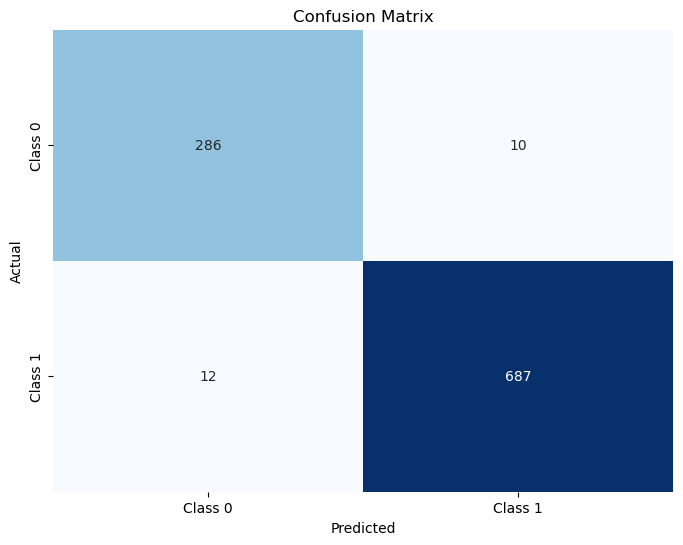

In [22]:
new_data=  X[unique_array]
scaler = MinMaxScaler()
new_data=scaler.fit_transform(new_data)
print('new data')
test_model(new_data,y)

In [15]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming you have a dataset with features (X) and labels (y)
# Split the dataset into training and testing sets
def Fine_Tuning_XGBoostModel(new_data,y):
    X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.2, random_state=42)

    # Initialize the XGBoost classifier
    xgb_classifier = xgb.XGBClassifier()

    # Define a parameter grid to search through
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 0.1, 0.2],
        'min_child_weight': [1, 3, 5],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [0, 1.0, 2.0],
        # Add other hyperparameters you want to tune
    }

    # Create a GridSearchCV object
    grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

    # Fit the model with the grid search object
    grid_search.fit(X_train, y_train)

    # Get the best parameters from the grid search
    best_params = grid_search.best_params_
    print("Best Hyperparameters:")
    print(best_params)

    # Use the best model to make predictions on the test set
    y_pred = grid_search.best_estimator_.predict(X_test)

    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy * 100:.2f}%")


In [21]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming you have a dataset with features (X) and labels (y)
# Split the dataset into training and testing sets
def test_model(full_data,y):
    X_train, X_test, y_train, y_test = train_test_split(full_data, y, test_size=0.2, random_state=42)

    # Use the best hyperparameters
    best_params = {
        'colsample_bytree': 0.8,
        'gamma': 0,
        'learning_rate': 0.2,
        'max_depth': 7,
        'min_child_weight': 1,
        'n_estimators': 200,
        'reg_alpha': 0.5,
        'reg_lambda': 0,
        'subsample': 0.8
    }

    # Initialize the XGBoost classifier with the best hyperparameters
    xgb_classifier = xgb.XGBClassifier(**best_params)

    # Train the model
    xgb_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = xgb_classifier.predict(X_test)

    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
  #  print("Confusion Matrix:")
   #print(conf_matrix)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()